In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from tensorflow.examples.tutorials.mnist import input_data

In [14]:
mnist = input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [15]:
print(mnist.train.images.shape)
print(mnist.test.images.shape)

(55000, 784)
(10000, 784)


In [16]:
x_train=mnist.train.images
y_train=mnist.train.labels
x_test=mnist.test.images
y_test=mnist.test.labels
x_validate=mnist.validation.images
y_validate=mnist.validation.labels

In [5]:
plt.style.available

['seaborn-talk',
 'classic',
 'seaborn-colorblind',
 'seaborn-dark-palette',
 'seaborn-whitegrid',
 'Solarize_Light2',
 'seaborn-deep',
 '_classic_test',
 'grayscale',
 'seaborn-paper',
 'seaborn-bright',
 'seaborn-dark',
 'seaborn-poster',
 'seaborn-pastel',
 'bmh',
 'seaborn-ticks',
 'fast',
 'seaborn-muted',
 'fivethirtyeight',
 'ggplot',
 'seaborn',
 'dark_background',
 'seaborn-notebook',
 'seaborn-darkgrid',
 'seaborn-white']

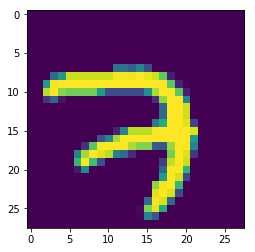

In [6]:
image=x_train[0].reshape(28,28)
plt.imshow(image)
plt.show()

In [7]:
clf=KNeighborsClassifier(n_jobs=8)

In [8]:
clf.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=8, n_neighbors=5, p=2,
           weights='uniform')

In [9]:
clf.score(x_train,y_train)

0.97898181818181818

In [10]:
from sklearn.model_selectionl_selection import cross_val_score

In [11]:
for k in range(1,30,2):
    clf1=KNeighborsClassifier(n_neighbors=k,n_jobs=8)
    score=cross_val_score(clf1,x_validate,y_validate)
    print(score.mean())

0.923201314119
0.918200633583
0.909600432855
0.902999712182
0.894200391614
0.88840059119
0.879800150414
0.87520047011
0.870800749814
0.86520066935
0.85940098895
0.854000988518
0.850200908198
0.843400707614
0.837600307069


In [17]:
clf.score(x_test,y_test)

0.9657

In [18]:
clf2=KNeighborsClassifier(n_neighbors=1,n_jobs=8)

In [20]:
clf2.fit(x_train,y_train)
clf2.score(x_test,y_test)

0.9677

In [21]:
y_predict=clf.predict(x_test)

In [22]:
filename='MNIST_test_predictions_in_one_hot.csv'
np.savetxt(filename,y_predict,delimiter=',')

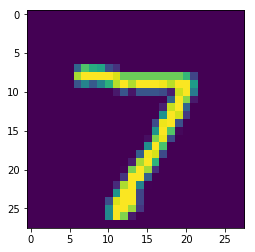

In [23]:
plt.imshow(x_test[0].reshape(28,28))
plt.show()

In [27]:
print("My prediction is : {}".format(np.argmax(y_predict[0])))

My prediction is : 7


In [30]:
y_predict_integer=np.argmax(y_predict,axis=1)

In [34]:
filename1='MNIST_test_prediction_in_integer.csv'
np.savetxt(filename1,y_predict_integer,delimiter=',')